In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# read the train and test data set.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [79]:
#show the shape of the files
train.shape, test.shape

((31647, 18), (13564, 17))

In [80]:
# show the content in the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [81]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [82]:
#display the columns in the data set.
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [83]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

As we can observe that train dataset have 18 columns and the test dataset has 17 columns as we have to predict the target variable for the test data set.

Lets find no. of catagorical and numerical variable in the dataset and will look at their data type.

In [84]:
# lets print the data types of the variables
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two types of data types:

1. Object: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. int64: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [85]:
#lets check the first 5 rows in dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Univarient Analysis

Lets check out target variable also known as dependent variable i.e. "subscribed". which is a catagorical variable lets chech the distribution of this variable and bar tablefor same.

In [86]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [87]:
#now change into percentage to plot in the graph
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

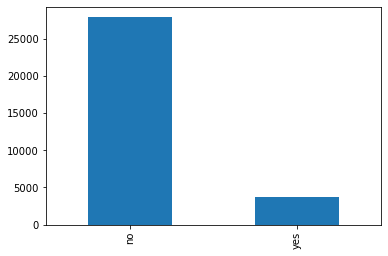

In [88]:
#bar plot for the same
train['subscribed'].value_counts().plot.bar()

So as we can conclude that around 11.7% of total given data have subscribed wich is 3715 of 31647 provided data.

We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. 

We will also look at the correlation plot to see which variables affects the target variable most

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

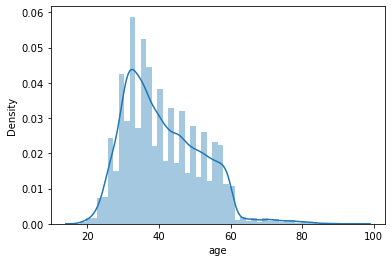

In [89]:
#lets look at the age variable distribution as its a continous variable.
sns.distplot(train['age'])

As we can see the most of the customer lies in the age between 20-60. lets check the other variable i.e. job which is a catagorical variable lets have a bar plot for showing the same.

<AxesSubplot:>

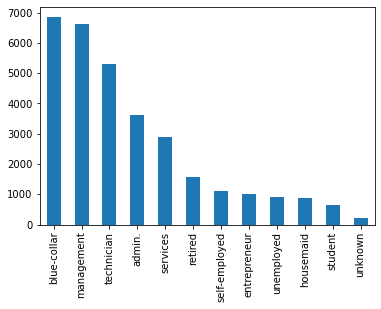

In [90]:
#barplot to plaot no of jobs done by clints.
train['job'].value_counts().plot.bar()

We can conclute from the graph that maximum number clients are from blue color job followed by management and technician. this shows that least client are from student background and unknown.

<AxesSubplot:>

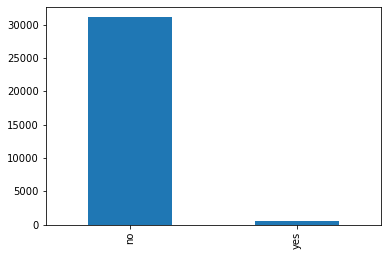

In [91]:
#lets check the default ratio of the clients. lets plot a bar plot for these catagorical variable display.
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

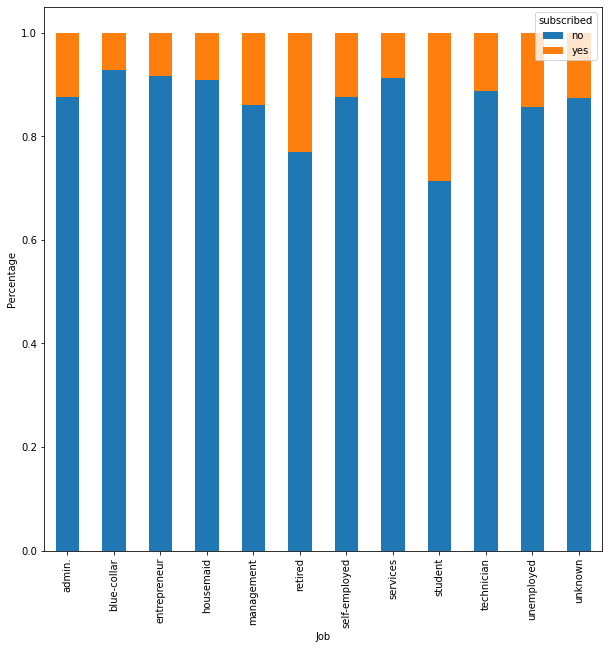

In [92]:
# Let's start with job and subscribed variable
print(pd.crosstab(train['job'], train['subscribed']))

job = pd.crosstab(train['job'], train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10)) ##  job.div(job.sum(1).astype(float), axis=0) shows the '1' index which is holding value of subscribe or not and converting it to float type for ploting in persentage form.
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can see that students and retired people have higher chances of subscribing. 
which is surprising as students generally do not subscribe to a term deposit. 
The possible reason is because the number of students in the dataset is less as compare to other job so percentage wise it is coming higher.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

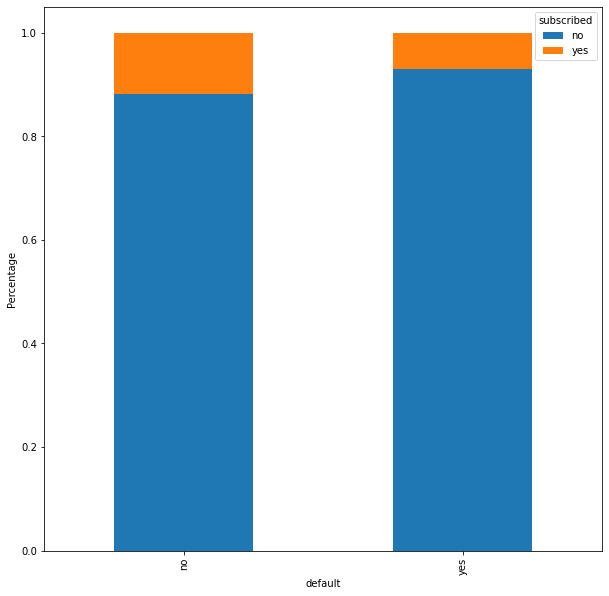

In [93]:
#Lets plot the default variable against the subscribed variable.
print(pd.crosstab(train['default'], train['subscribed']))

default = pd.crosstab(train['default'], train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('default')
plt.ylabel("Percentage")

We can see that clients having no previous default have slightly higher chances of subscribing as compared to the clients who have previous default history.

Let's now see at how correlated our numerical variables are. By this we can get an overview of the variables which might affect our target variable. 
We will convert our target variable into numeric values first.

In [94]:
train['subscribed'].replace('yes', 1, inplace=True)
train['subscribed'].replace('no', 0, inplace=True)

<AxesSubplot:>

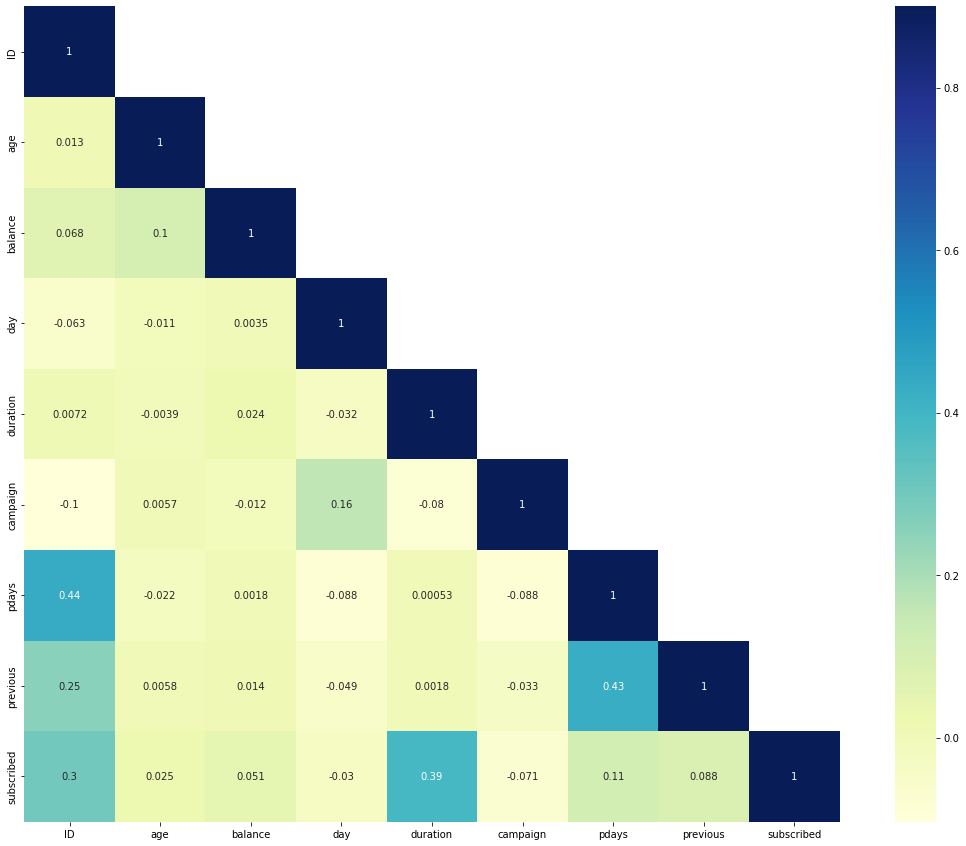

In [95]:
#finding correlation between numeric variable in the data set and matching with the target vriable.
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can see that duration of is highly correlated with the target variable. If the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [96]:
#finding missing values in the dataset.
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no null values in the data set. Now we cna strat making predictive model for the dataset. As predictive models cnat take numericals as input so we need to create numerical values for all catagoricla variable. where we need to drop customer ID as it is unique number and create dummys for other variable.

In [97]:
train1 = train.drop('subscribed', axis=1)
target = train['subscribed']

In [98]:
train1 =  pd.get_dummies(train1)

In [99]:
train1.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
#now lets import train test split assign training and validation to the model
from sklearn.model_selection import train_test_split

In [101]:
#assigning 20% value to the for tesing purpose and comparing the accuracy of the model and 80% of it is given to the training the model.
x_train, x_val, y_train, y_val = train_test_split(train1, target, test_size=0.2, random_state=12) # here x_train is for training the complete dataframe and x_val is validation of the model on rest 20% of the dtaaset excluding the target variable
# y_train and y_val holds the value of the target variable and need to get the accuricy of the model. when y_val is compared with predicted value of dataset x_val(which is found using the ML model) 

Now the data is ready nw time to execut the Model of Logistic regression as the output is a catagorical variable.

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
# define the model
lreg = LogisticRegression()

In [104]:
lreg.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
Predict = lreg.predict(x_val)
Predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
#now we need a scoring matrix to chek weather we are getting a desirable score or not 
from sklearn.metrics import accuracy_score

In [107]:
#calculating the accuricy score of the model
accuracy_score(y_val,Predict)

0.8873617693522907

We get the accuricy score of the model to be around 89%.  As Logistic regression has a linear decision boundary. We need a model that can capture this non linearity 

# Decision Tree

In [108]:
#this is to remove linearity in the model 
from sklearn.tree import DecisionTreeClassifier

In [109]:
#lets defien the decission tree clasifire and lets set the max depth of 10 with hyper tunig and improving the output and we cna change the same for improving the score
clr = DecisionTreeClassifier(max_depth=10, random_state=0)

In [110]:
clr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [111]:
Predict_clr = clr.predict(x_val)
Predict_clr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [112]:
accuracy_score(y_val,Predict_clr)

0.8993680884676145

After removing the non linearity using the decission tree we get the accuracy score of around 90%.

In [113]:
#Now find the Subscribtion values in the test data set using the decission tree classifier to remove linearity in the model
#before that lets convert the values in the test data set and drop ID
test = pd.get_dummies(test)


In [114]:
Predict_test_tree = clr.predict(test)
Predict_test_tree

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Now lets save the output in the CSV file and then conclude the result in the xlsx file solution checker and find the result accuricy. 

In [115]:
submit = pd.DataFrame()

In [116]:
submit['ID'] = test['ID']
submit['subscribed'] = Predict_test_tree

In [117]:
submit['subscribed'].replace(0, 'no', inplace= True)
submit['subscribed'].replace(1, 'yes', inplace= True)

In [118]:
submit

,ID,subscribed
0,38441,no
1,40403,no
2,3709,no
3,37422,no
4,12527,no
...,...,...
13559,23465,no
13560,11743,no
13561,28292,no
13562,45163,yes


In [120]:
submit.to_csv('Submission.csv', header=True, index=False)

The decision tree classifier had generated prediction with an accurcy score of 90.18% check in the solution checker.